In [1]:
import os

import joblib
import scipy.io as scio
import cv2
import numpy as np
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

In [2]:
read_path = "./datageneration/out/"
write_path = "./poseX/"

files = os.listdir(read_path)
print(len(files))
print(max((len(x), x) for x in files if x[-4:]=='.png'))

12707
(17, '7457_01_image.png')


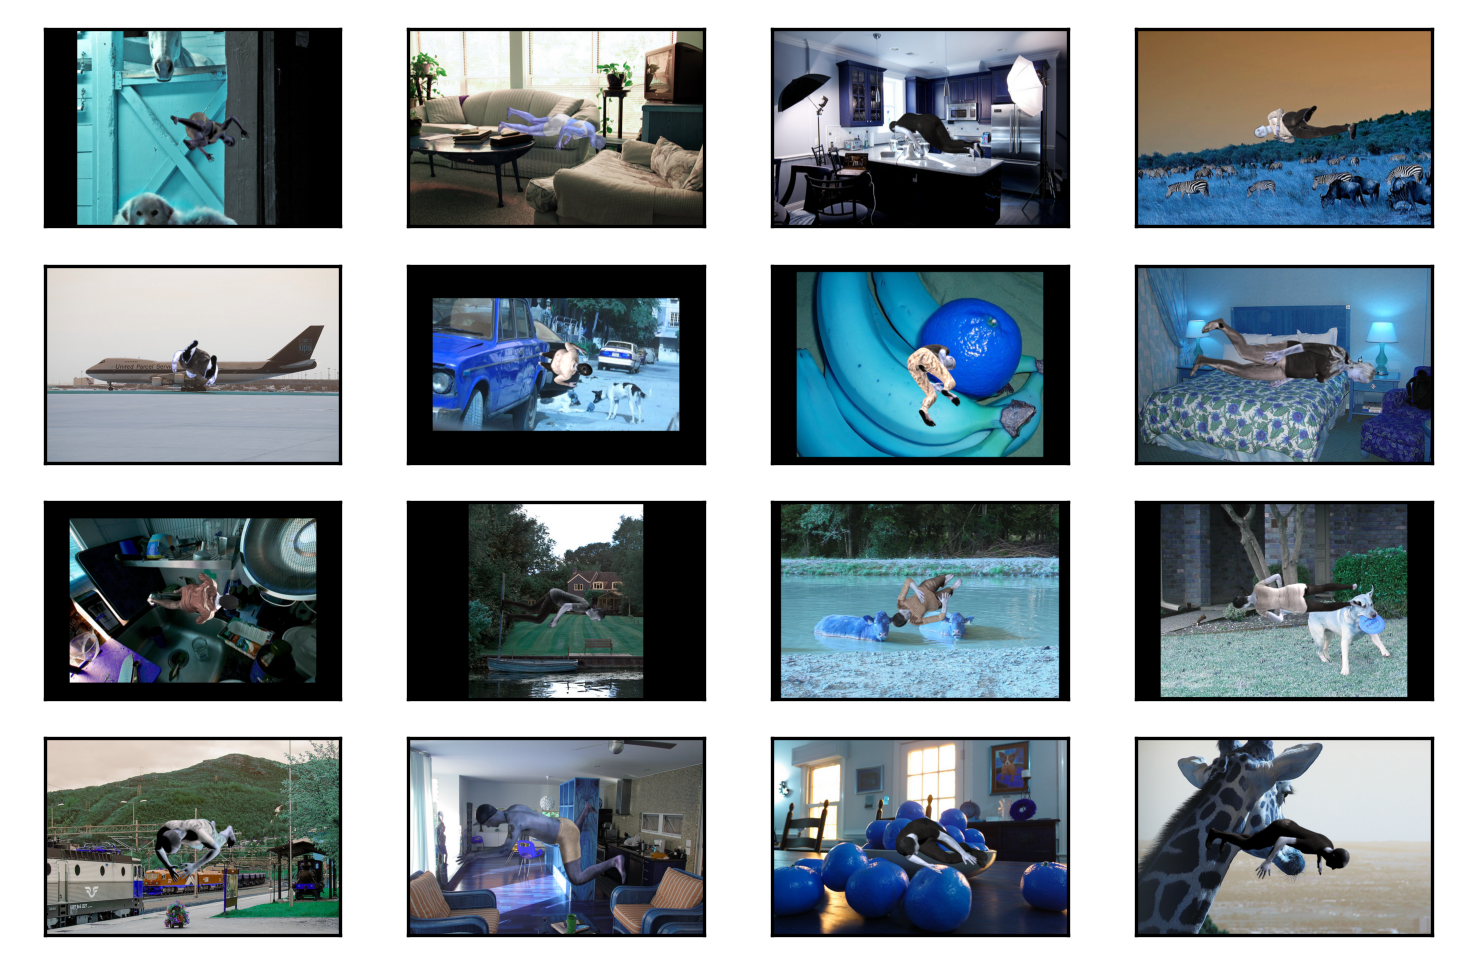

In [3]:
img_paths = np.random.choice([x for x in files if x[-4:]=='.png'], 16)

plt.figure(dpi=300)
for i in range(1, 17):
    img_file = os.path.join(read_path, img_paths[i-1])
    img = cv2.imread(img_file)
    plt.subplot(4, 4, i)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
plt.show()

In [4]:
anns = {}

for f in tqdm(files):
    if f.endswith(".png"):
        img_file = os.path.join(read_path, f)
        img = cv2.imread(img_file)
        out_img = f.replace(".png", ".jpg")
        file_write = os.path.join(write_path, "cocoposes/", out_img)
        cv2.imwrite(file_write, img)
        
        data_file = os.path.join(read_path, f.replace("image.png", "info.mat"))
        data = scio.loadmat(data_file)
        anns[out_img] = data

  0%|          | 0/12707 [00:00<?, ?it/s]

In [5]:
joblib.dump(anns, os.path.join(write_path, 'annotations_cocoposes_sep01.pkl'))

['./poseX/annotations_cocoposes_sep01.pkl']

In [6]:
len(anns)

6353